In [34]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [35]:
# Load the dataset
df = pd.read_csv("/content/cancer.csv")
print("CSV Shape:", df.shape)
df.head()

CSV Shape: (569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [36]:
# Drop 'id' column and extract features
X = df.drop(columns=['id', 'diagnosis'], axis=1)

# Encode 'diagnosis': M = 1, B = 0
Y = df['diagnosis'].map({'M': 1, 'B': 0}).values

# Handle missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Check shape
print("X shape:", X.shape)
print("Y shape:", Y.shape)

X shape: (569, 30)
Y shape: (569,)


In [37]:
# Confusion Matrix Plot Function
def get_confusion_matrix(cnf_matrix):
    class_names = sorted(Y.unique())
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [38]:
# Evaluation Metrics Function
def get_results(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    return acc * 100, prec * 100, rec * 100

In [39]:
# PCA + SVM Training and Evaluation
def svm_model_training_pca(X, Y):
    n = X.shape[1]
    acc_list = []
    recall_list = []
    precision_list = []
    k_list = []

    for i in range(n):
        print("K =", i + 1)
        pca = PCA(n_components=i + 1)
        principalComponents = pca.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y, test_size=0.20, random_state=99)
        classifier = SVC(kernel='linear')
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        result = get_results(y_test, y_pred)
        acc_list.append(result[0])
        precision_list.append(result[1])
        recall_list.append(result[2])
        k_list.append(i + 1)

    high_acc = max(acc_list)
    high_acc_k = acc_list.index(high_acc) + 1
    print("----------------")
    print("Highest Classification Accuracy Achieved: {:.2f}% for K = {}".format(high_acc, high_acc_k))

    return k_list, acc_list, precision_list, recall_list

In [40]:
# Plotting metrics over principal components
def plot_result_with(k_list, acc_list, precision_list, recall_list):
    plt.plot(k_list, acc_list, label='Accuracy')
    plt.plot(k_list, precision_list, label='Precision')
    plt.plot(k_list, recall_list, label='Recall')
    plt.xlabel("K")
    plt.ylabel("Metric Value")
    plt.title("PCA Dimensionality vs SVM Metrics")
    plt.legend()
    plt.show()

Problem 1:


*  1.1



In [41]:
# Train and evaluate
k_list, acc_list, precision_list, recall_list = svm_model_training_pca(X, Y)

K = 1
Accuracy: 0.9122807017543859
Precision: 0.9375
Recall: 0.7894736842105263
K = 2
Accuracy: 0.9473684210526315
Precision: 0.9444444444444444
Recall: 0.8947368421052632
K = 3
Accuracy: 0.9473684210526315
Precision: 0.9444444444444444
Recall: 0.8947368421052632
K = 4
Accuracy: 0.9736842105263158
Precision: 0.9487179487179487
Recall: 0.9736842105263158
K = 5
Accuracy: 0.9736842105263158
Precision: 0.9487179487179487
Recall: 0.9736842105263158
K = 6
Accuracy: 0.9736842105263158
Precision: 0.9487179487179487
Recall: 0.9736842105263158
K = 7
Accuracy: 0.9649122807017544
Precision: 0.9473684210526315
Recall: 0.9473684210526315
K = 8
Accuracy: 0.9649122807017544
Precision: 0.9473684210526315
Recall: 0.9473684210526315
K = 9
Accuracy: 0.956140350877193
Precision: 0.9459459459459459
Recall: 0.9210526315789473
K = 10
Accuracy: 0.956140350877193
Precision: 0.9459459459459459
Recall: 0.9210526315789473
K = 11
Accuracy: 0.9736842105263158
Precision: 0.9487179487179487
Recall: 0.9736842105263158


1.2

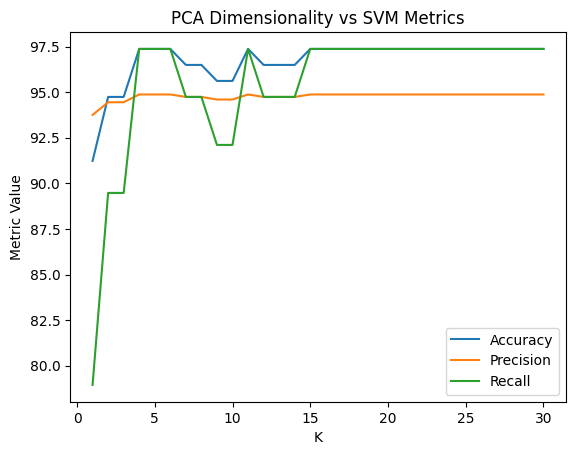

In [56]:
# Plot the results
plot_result_with(k_list, acc_list, precision_list, recall_list)

1.3

In [44]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Define function to test multiple SVM kernels with fixed number of principal components
def svm_model_training_with_kernel(X, Y, n_pc):
    kernel_list = ["linear", "poly", "rbf", "sigmoid"]
    acc_list = []
    precision_list = []
    recall_list = []

    for i in range(len(kernel_list)):
        print("Kernel =", kernel_list[i])

        # Apply PCA
        pca = PCA(n_components=n_pc)
        principalComponents = pca.fit_transform(X)

        # Train/Test split
        X_train, X_test, y_train, y_test = train_test_split(
            principalComponents, Y, test_size=0.20, random_state=99
        )

        # Train SVM with specified kernel
        classifier = SVC(kernel=kernel_list[i])
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)

        # Evaluate
        r = get_results(y_test, y_pred)  # From previous function
        acc_list.append(r[0])
        precision_list.append(r[1])
        recall_list.append(r[2])

        print("----------------")

    # Find best kernel by accuracy
    high_acc = max(acc_list)
    n = acc_list.index(high_acc)
    high_acc_kernel = kernel_list[n]
    print("Highest Classification Accuracy Achieved: {:.6f}% for Kernel = {}".format(high_acc, high_acc_kernel))

    return kernel_list, acc_list, precision_list, recall_list

In [57]:
# Plot the results and compare the accuracies for different kernels
kernel_list, acc_list, precision_list, recall_list = svm_model_training_with_kernel(X, Y, 4)

Kernel = linear
Accuracy: 0.9736842105263158
Precision: 0.9487179487179487
Recall: 0.9736842105263158
----------------
Kernel = poly
Accuracy: 0.868421052631579
Precision: 1.0
Recall: 0.6052631578947368
----------------
Kernel = rbf
Accuracy: 0.9385964912280702
Precision: 0.9428571428571428
Recall: 0.868421052631579
----------------
Kernel = sigmoid
Accuracy: 0.9035087719298246
Precision: 0.8648648648648649
Recall: 0.8421052631578947
----------------
Highest Classification Accuracy Achieved: 97.368421% for Kernel = linear


Problem 2


*  2.1



In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.decomposition import PCA
import warnings
from sklearn.exceptions import DataConversionWarning

# Suppress the y-shape warning from sklearn
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Load dataset
df = pd.read_csv("/content/Housing.csv")
print("CSV File Shape:")
print(df.shape)
df.head()

CSV File Shape:
(545, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [60]:
# Convert binary categorical columns
svar_list = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_mapping(x):
    return x.map({'yes': 1, 'no': 0})

df[svar_list] = df[svar_list].apply(binary_mapping)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [61]:
# Extract Features and Target
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
            'guestroom', 'basement', 'hotwaterheating',
            'airconditioning', 'parking', 'prefarea']

target_column = 'price'
data = df[num_vars]

X = data.to_numpy()
Y = df[[target_column]].to_numpy()

# Impute missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

print("Input shape:", X.shape)
print("Target shape:", Y.shape)

Input shape: (545, 11)
Target shape: (545, 1)


In [62]:
# Cost Function for SVR
def compute_cost(y, y_pred):
    m = len(y)
    errors = np.subtract(y, y_pred)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [63]:
#  Train SVR Model (No PCA)
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

def svr_model_training(X, Y):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=99)
    classifier = SVR()
    classifier.fit(X_train, y_train)
    Y_pred = classifier.predict(X_test)
    loss = compute_cost(y_test, Y_pred)
    print("Loss:", loss)

In [64]:
#Run
svr_model_training(X, Y)

Loss: 238290456164115.3


In [65]:
# PCA + SVR Training Across K
from sklearn.decomposition import PCA

def svr_model_training_pca(X, Y):
    n = X.shape[1]
    loss_list = []
    k_list = []

    for i in range(n):
        print("K =", i+1)
        pca = PCA(n_components=i+1)
        principalComponents = pca.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y, test_size=0.20, random_state=9)

        classifier = SVR(kernel='linear')
        classifier.fit(X_train, y_train)
        Y_pred = classifier.predict(X_test)

        loss = compute_cost(y_test, Y_pred)
        print("Loss:", loss)

        loss_list.append(loss)
        k_list.append(i+1)

    low_loss = min(loss_list)
    low_loss_k = loss_list.index(low_loss) + 1
    print("-------------------------")
    print("Lowest Loss Achieved:", low_loss, "for K number =", low_loss_k)

    return k_list, loss_list

In [66]:
# Run
k_list, loss_list = svr_model_training_pca(X, Y)

K = 1
Loss: 250088245443913.44
K = 2
Loss: 250064272993220.78
K = 3
Loss: 250063469523478.62
K = 4
Loss: 250063984078365.66
K = 5
Loss: 250065669922950.5
K = 6
Loss: 250065169858786.6
K = 7
Loss: 250065604004005.22
K = 8
Loss: 250067194202934.53
K = 9
Loss: 250067274612974.3
K = 10
Loss: 250067050044776.47
K = 11
Loss: 250067033255061.38
-------------------------
Lowest Loss Achieved: 250063469523478.62 for K number = 3


In [67]:
# Compare Kernels (with PCA)
def svr_model_training_with_kernel(X, Y, n_pc):
    kernel_list = ["linear", "poly", "rbf"]
    loss_list = []
    y_pred_list = []

    pca = PCA(n_components=n_pc)
    principalComponents = pca.fit_transform(X)

    for i in kernel_list:
        print("Kernel =", i)
        X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y, test_size=0.20, random_state=99)
        classifier = SVR(kernel=i)
        classifier.fit(X_train, y_train)
        Y_pred = classifier.predict(X_test)

        y_pred_list.append(Y_pred)
        loss = compute_cost(y_test, Y_pred)
        loss_list.append(loss)
        print("Loss:", loss)
        print("-------------------------")

    low_loss = min(loss_list)
    n = loss_list.index(low_loss)
    low_loss_kernel = kernel_list[n]
    print("Lowest Loss Achieved:", low_loss, "for Kernel =", low_loss_kernel)

    return kernel_list, y_pred_list, loss_list

In [68]:
# Run
kernel_list, y_pred_list, y_test = svr_model_training_with_kernel(X, Y, n_pc=3)

Kernel = linear
Loss: 306023058583913.25
-------------------------
Kernel = poly
Loss: 238440221378996.94
-------------------------
Kernel = rbf
Loss: 238289370339162.38
-------------------------
Lowest Loss Achieved: 238289370339162.38 for Kernel = rbf
